# Scanpy: Differential expression

Once we have done clustering, let's compute a ranking for the highly differential genes in each cluster. 


Differential expression is performed with the function `rank_genes_group`.  The default method to compute differential expression is the `t-test_overestim_var`. Other implemented methods are: `logreg`, `t-test` and `wilcoxon`.

By default, the .raw attribute of AnnData is used in case it has been initialized, it can be changed by setting `use_raw=False`. 

*OBS!* Note that by default the method uses setting `n_genes=100`, and will only report top 100 genes.

The clustering with resolution 0.6 seems to give a reasonable number of clusters, so we will use that clustering for all DE tests.

First, let's import libraries and fetch the clustered data from the previous lab.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()


/Users/asbj/miniconda3/envs/sc_course/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.17.3 scipy==1.3.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.settings.set_figure_params(dpi=80)

Read in the clustered data object.

In [3]:
adata = sc.read_h5ad('./data/scanpy_clustered_3pbmc.h5ad')

In [4]:
print(adata.shape)
print(adata.raw.shape)

(2527, 2055)
(2527, 16766)


### T-test 

ranking genes
    finished (0:00:01)


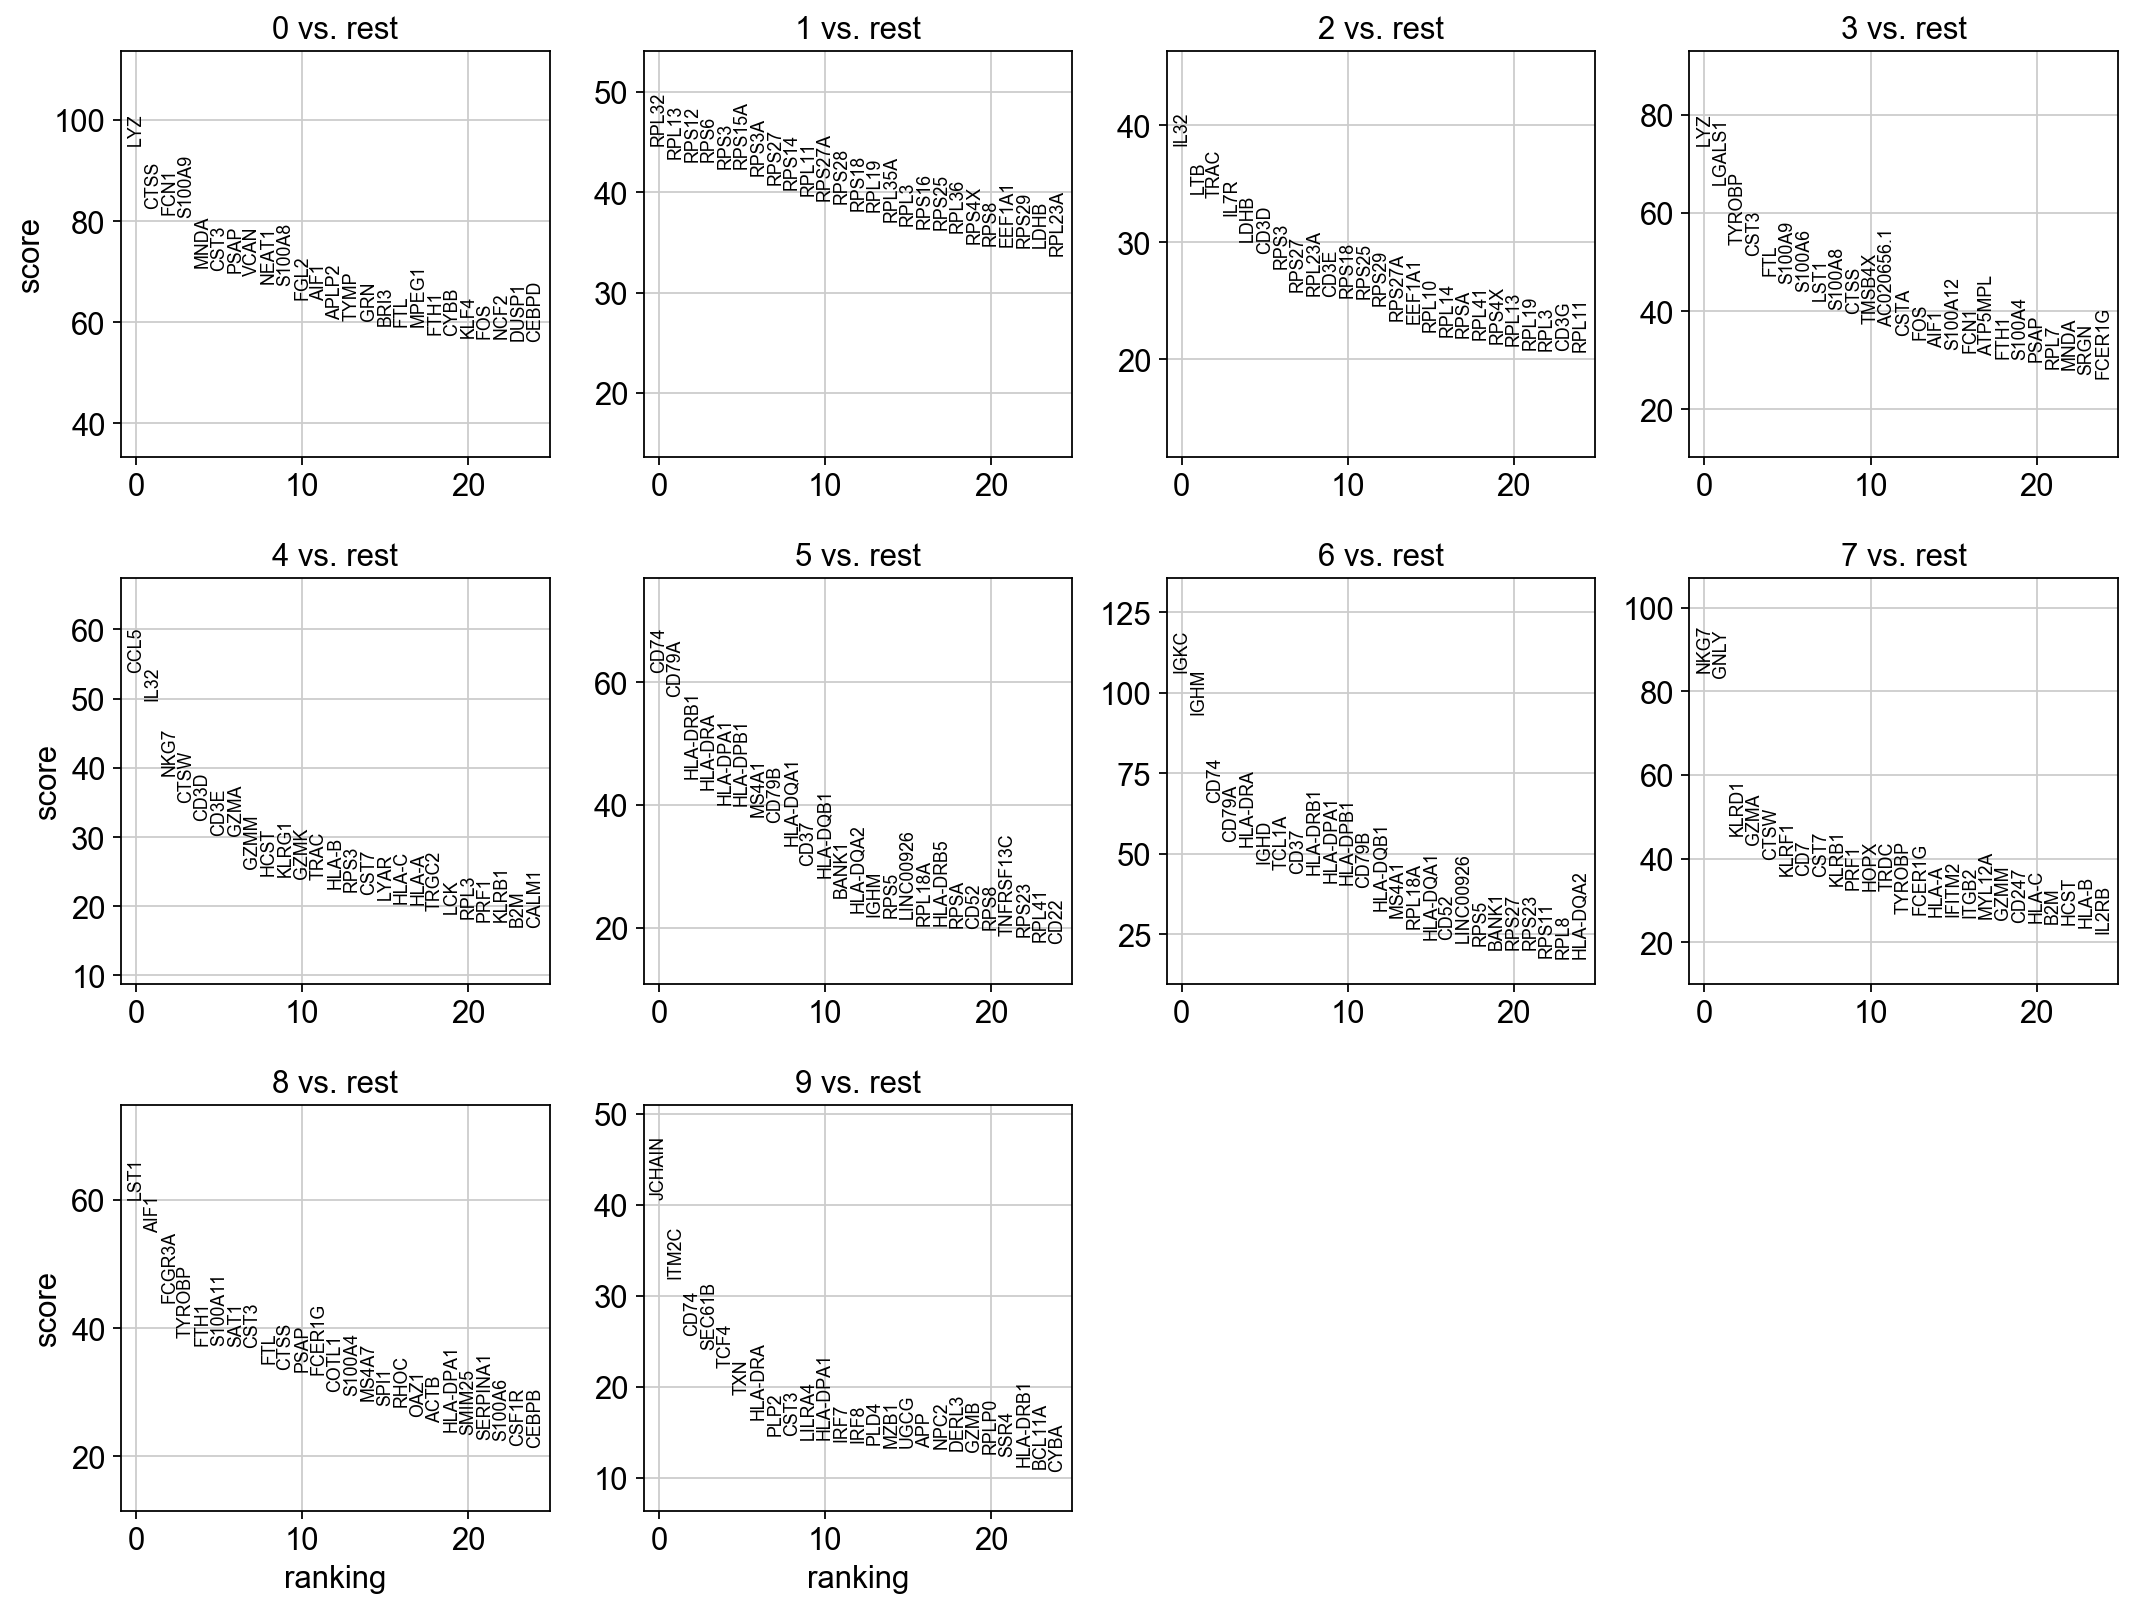

In [5]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")


In [6]:
# results are stored in the adata.uns["t-test"] slot
adata

AnnData object with n_obs × n_vars = 2527 × 2055 
    obs: 'batch', 'lib_prep', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'n_genes_by_counts', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'percent_mito', 'percent_ribo', 'total_counts', 'leiden_1.0', 'leiden_0.6', 'leiden_0.4', 'leiden_1.4', 'louvain_1.0', 'louvain_0.6', 'louvain_0.4', 'louvain_1.4'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dendrogram_leiden_1.0', 'dendrogram_louvain_1.0', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_1.0_colors', 'leiden_1.4_colors', 'lib_prep_colors', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_1.0

### T-test overestimated_variance

ranking genes
    finished (0:00:01)


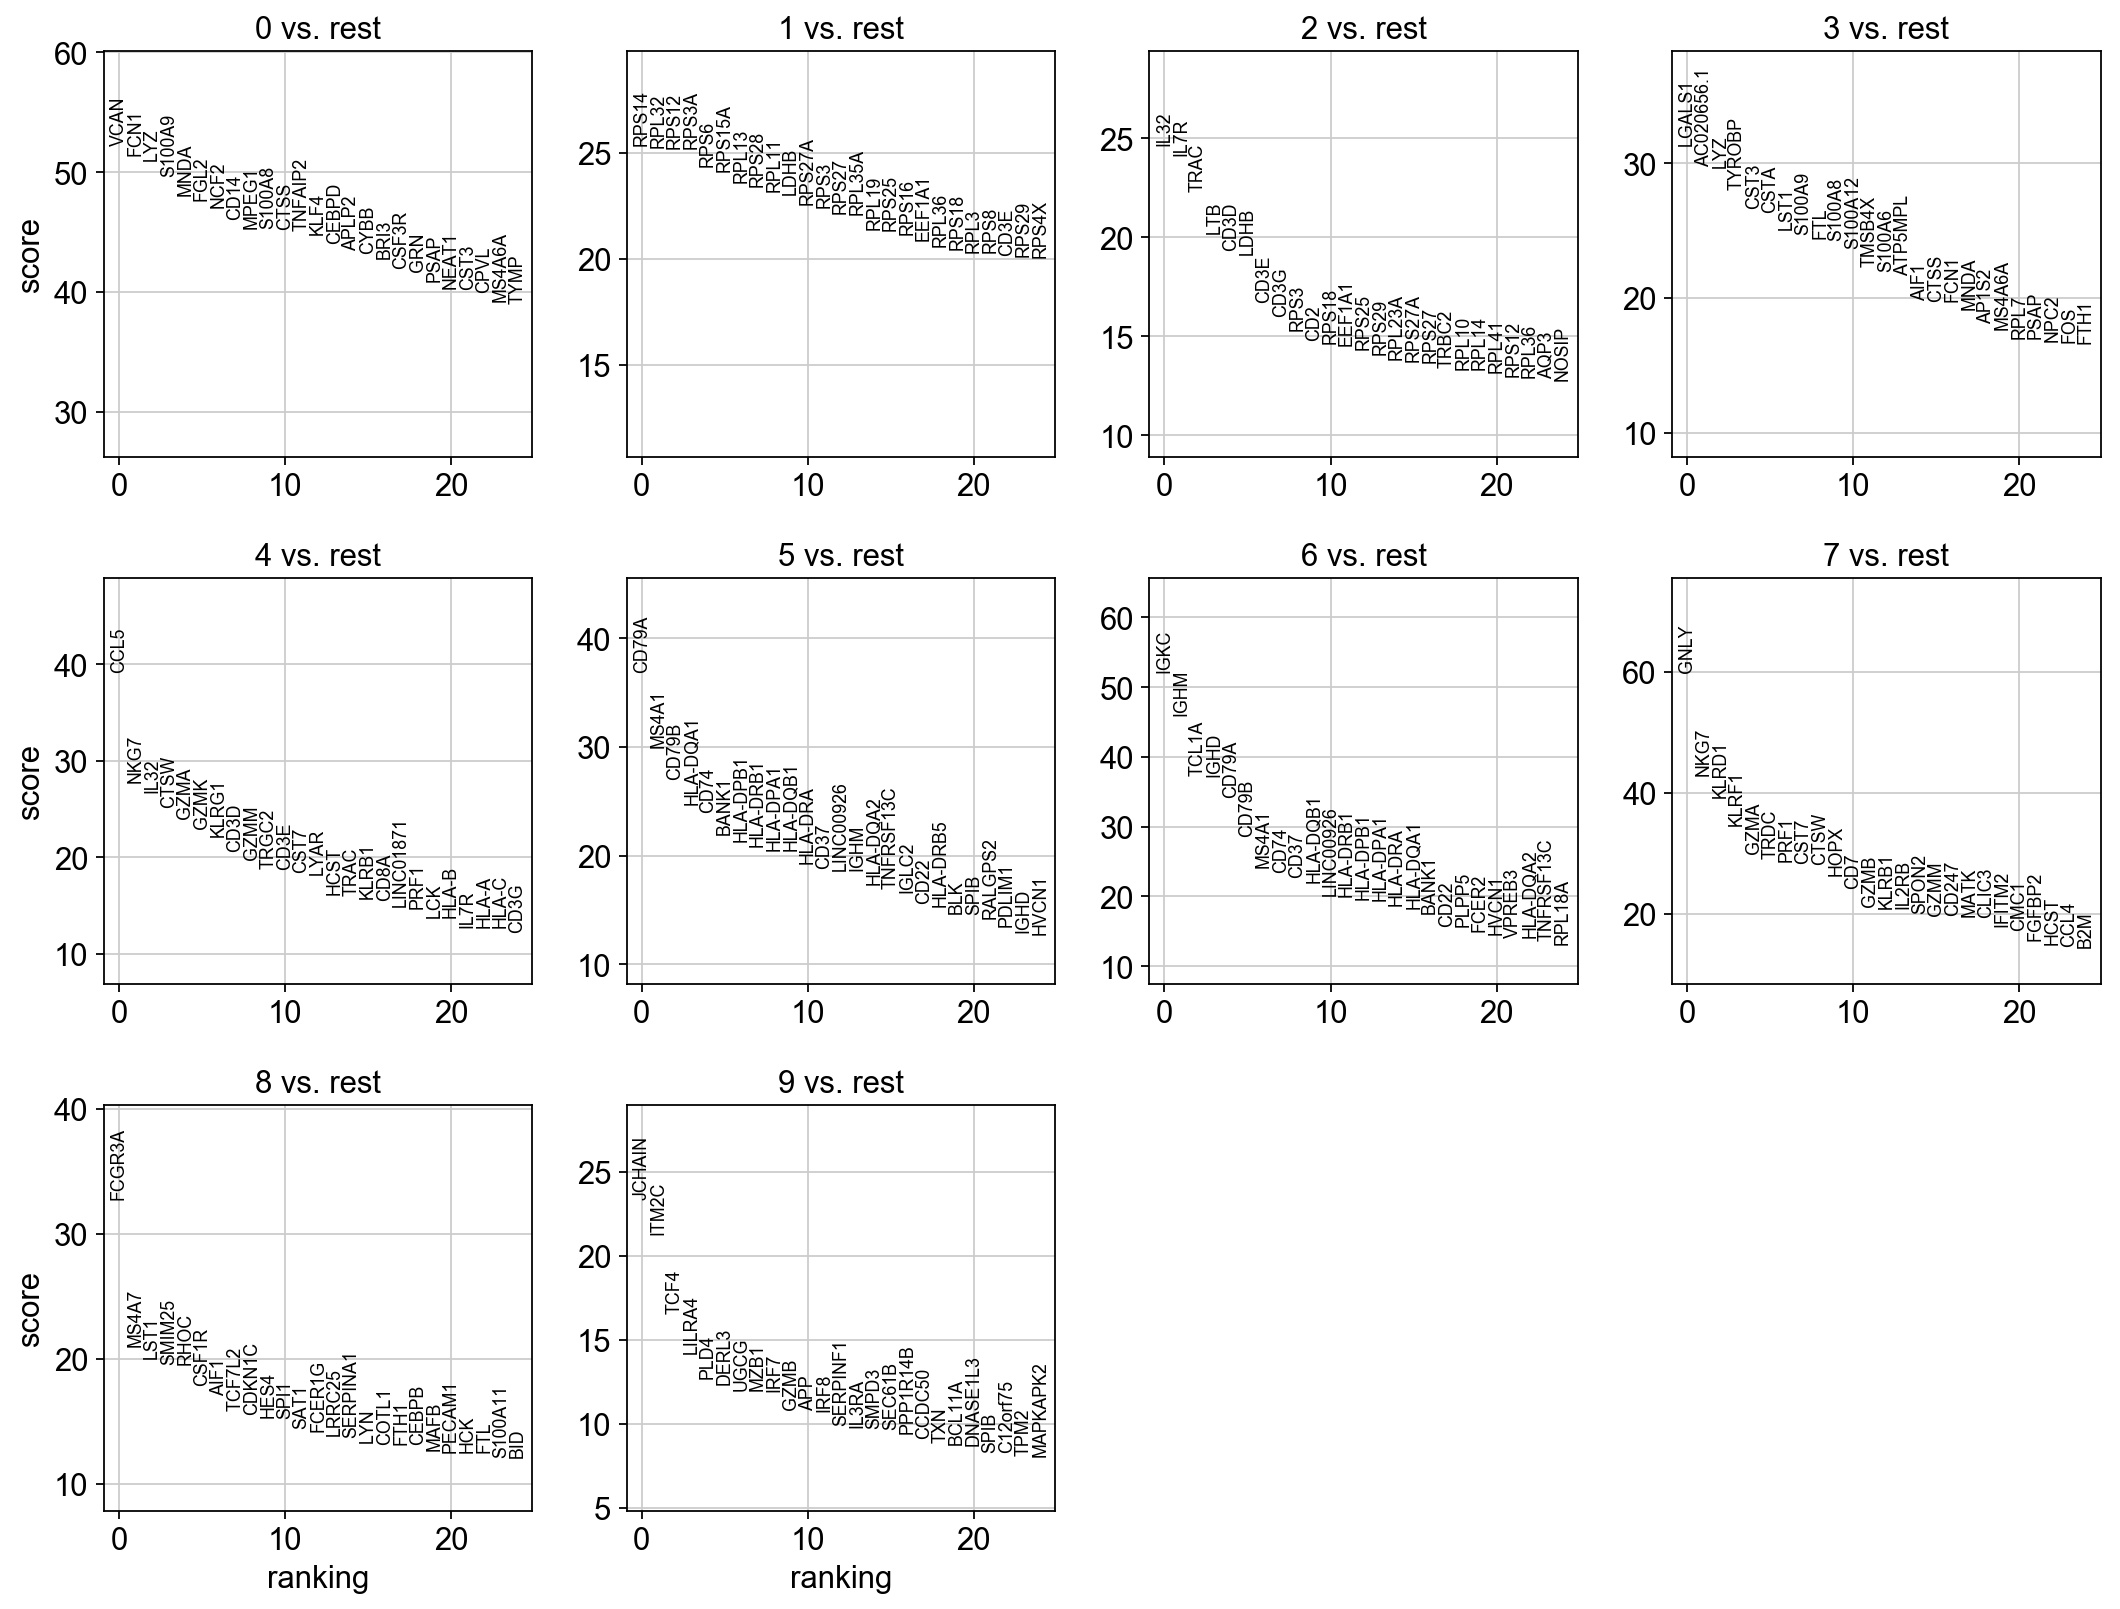

In [7]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")


### Wilcoxon rank-sum

The result of a [Wilcoxon rank-sum (Mann-Whitney-U)](https://de.wikipedia.org/wiki/Wilcoxon-Mann-Whitney-Test) test is very similar. We recommend using the latter in publications, see e.g., [Sonison & Robinson (2018)](https://doi.org/10.1038/nmeth.4612). You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.

ranking genes
    finished (0:00:04)


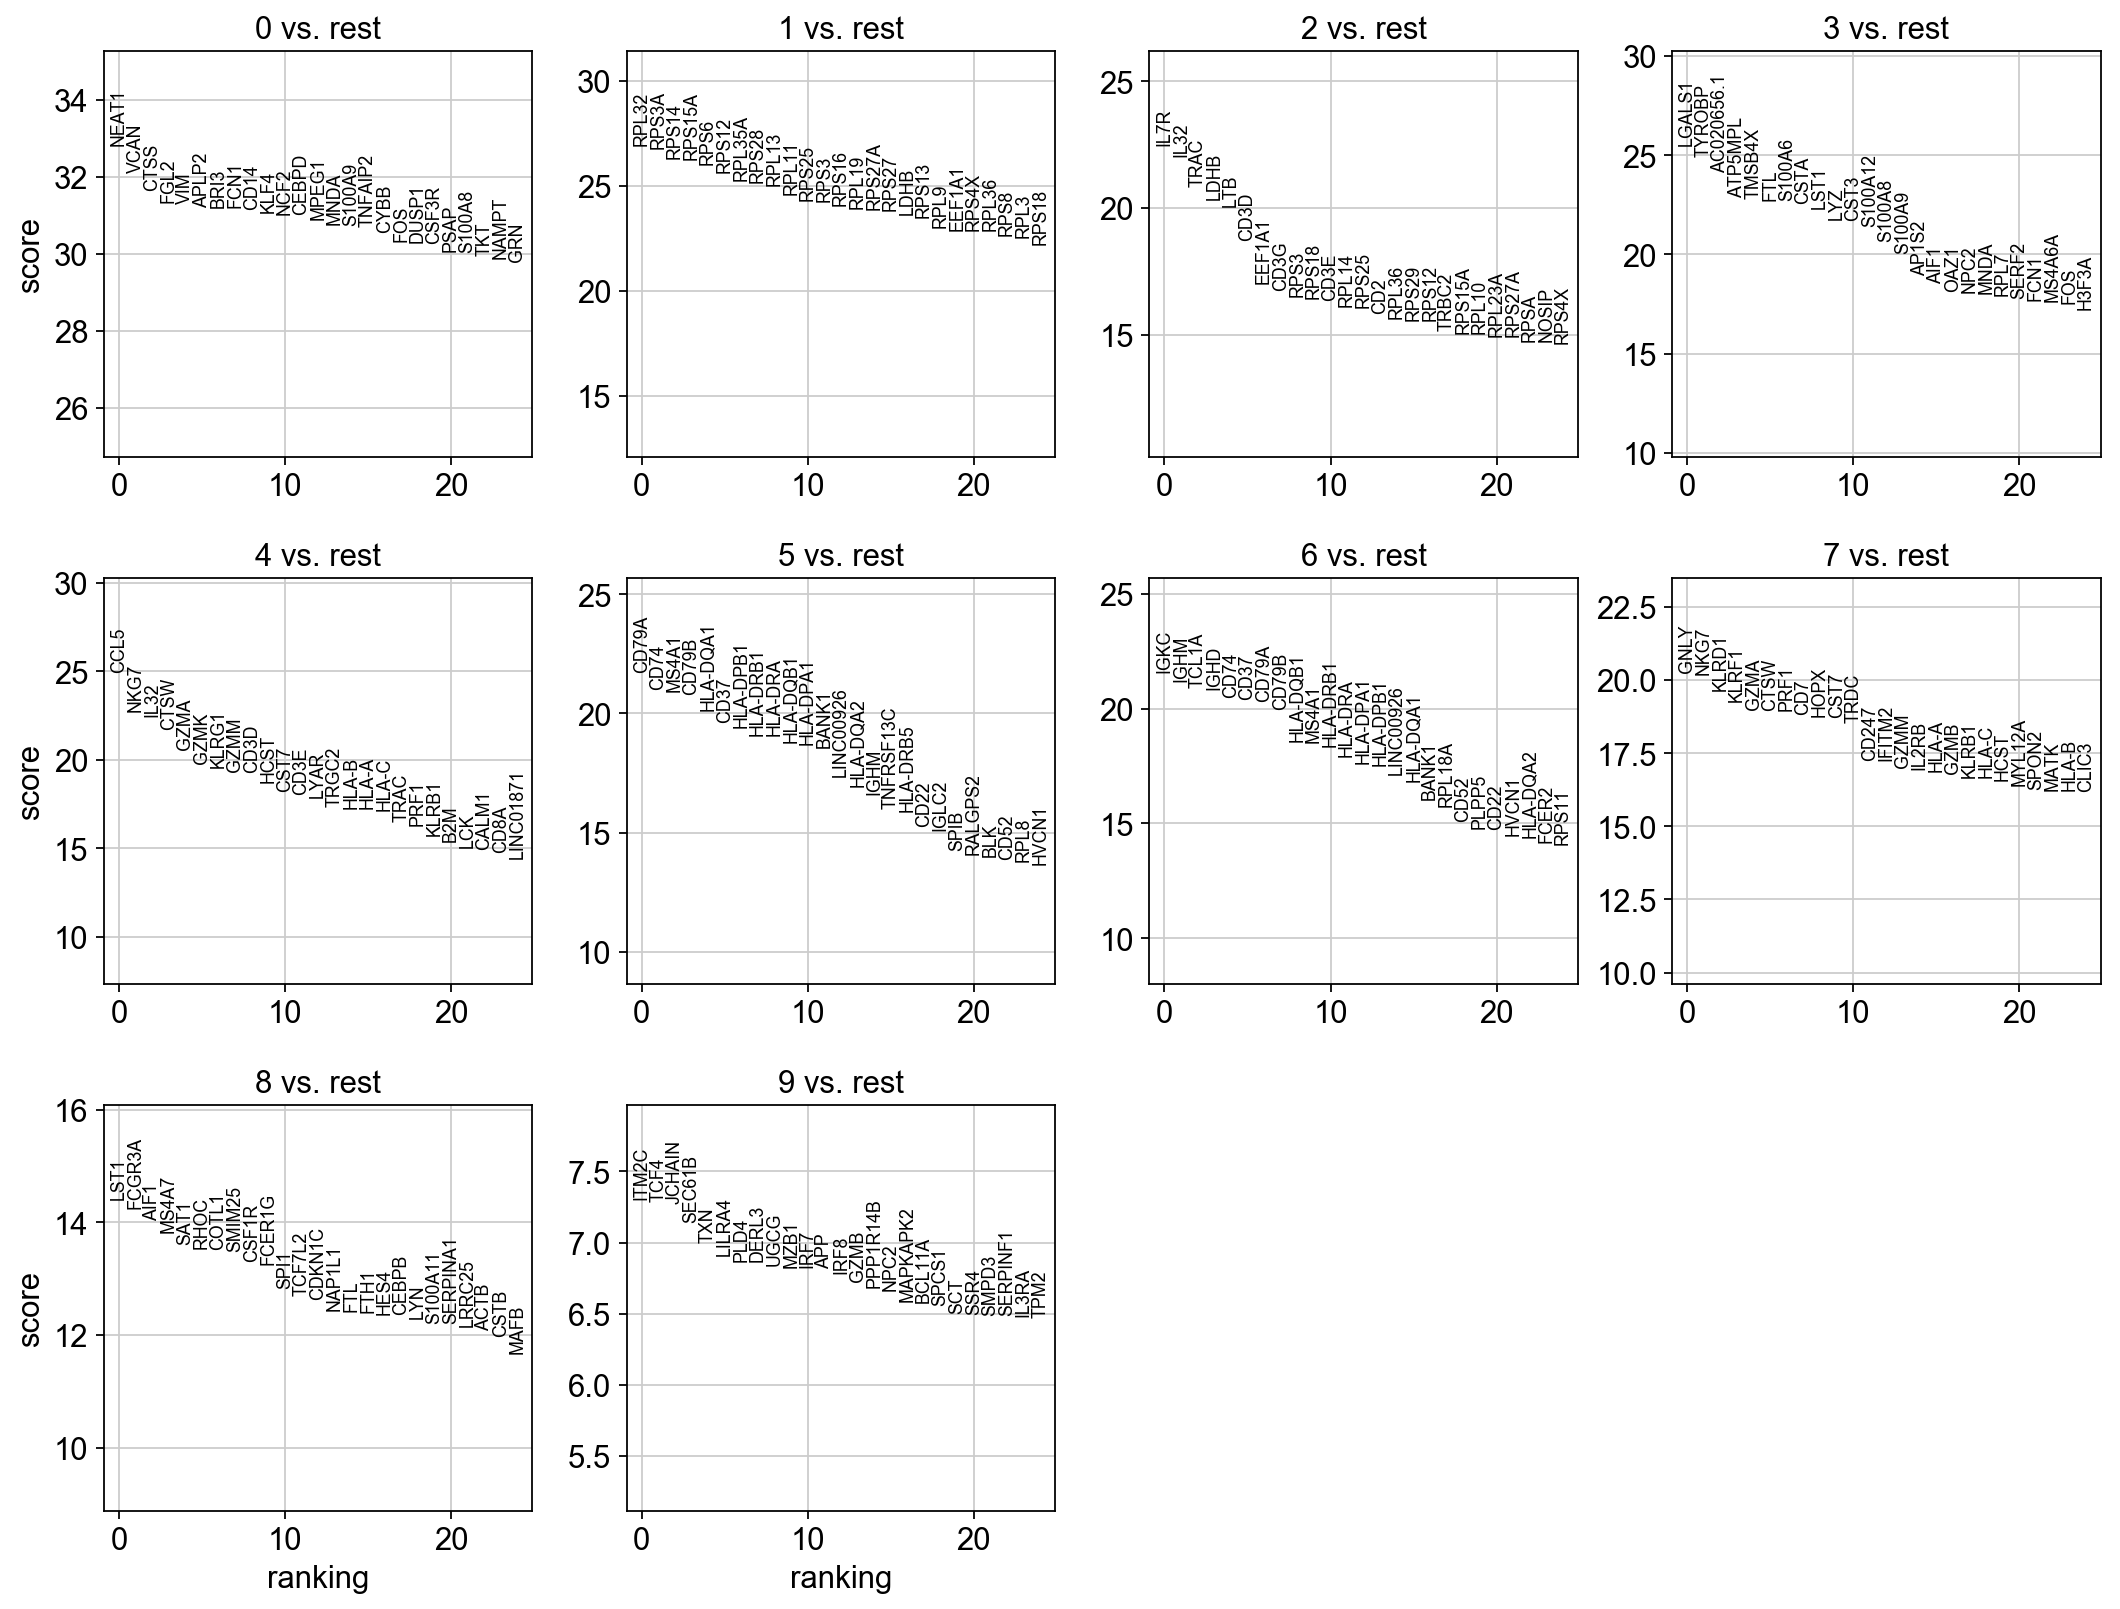

In [8]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

### Logistic regression test

As an alternative, let us rank genes using logistic regression. For instance, this has been suggested by [Natranos et al. (2018)](https://doi.org/10.1101/258566). The essential difference is that here, we use a multi-variate appraoch whereas conventional differential tests are uni-variate. [Clark et al. (2014)](https://doi.org/10.1186/1471-2105-15-79) has more details.

ranking genes


/Users/asbj/miniconda3/envs/sc_course/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/asbj/miniconda3/envs/sc_course/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


    finished (0:00:05)


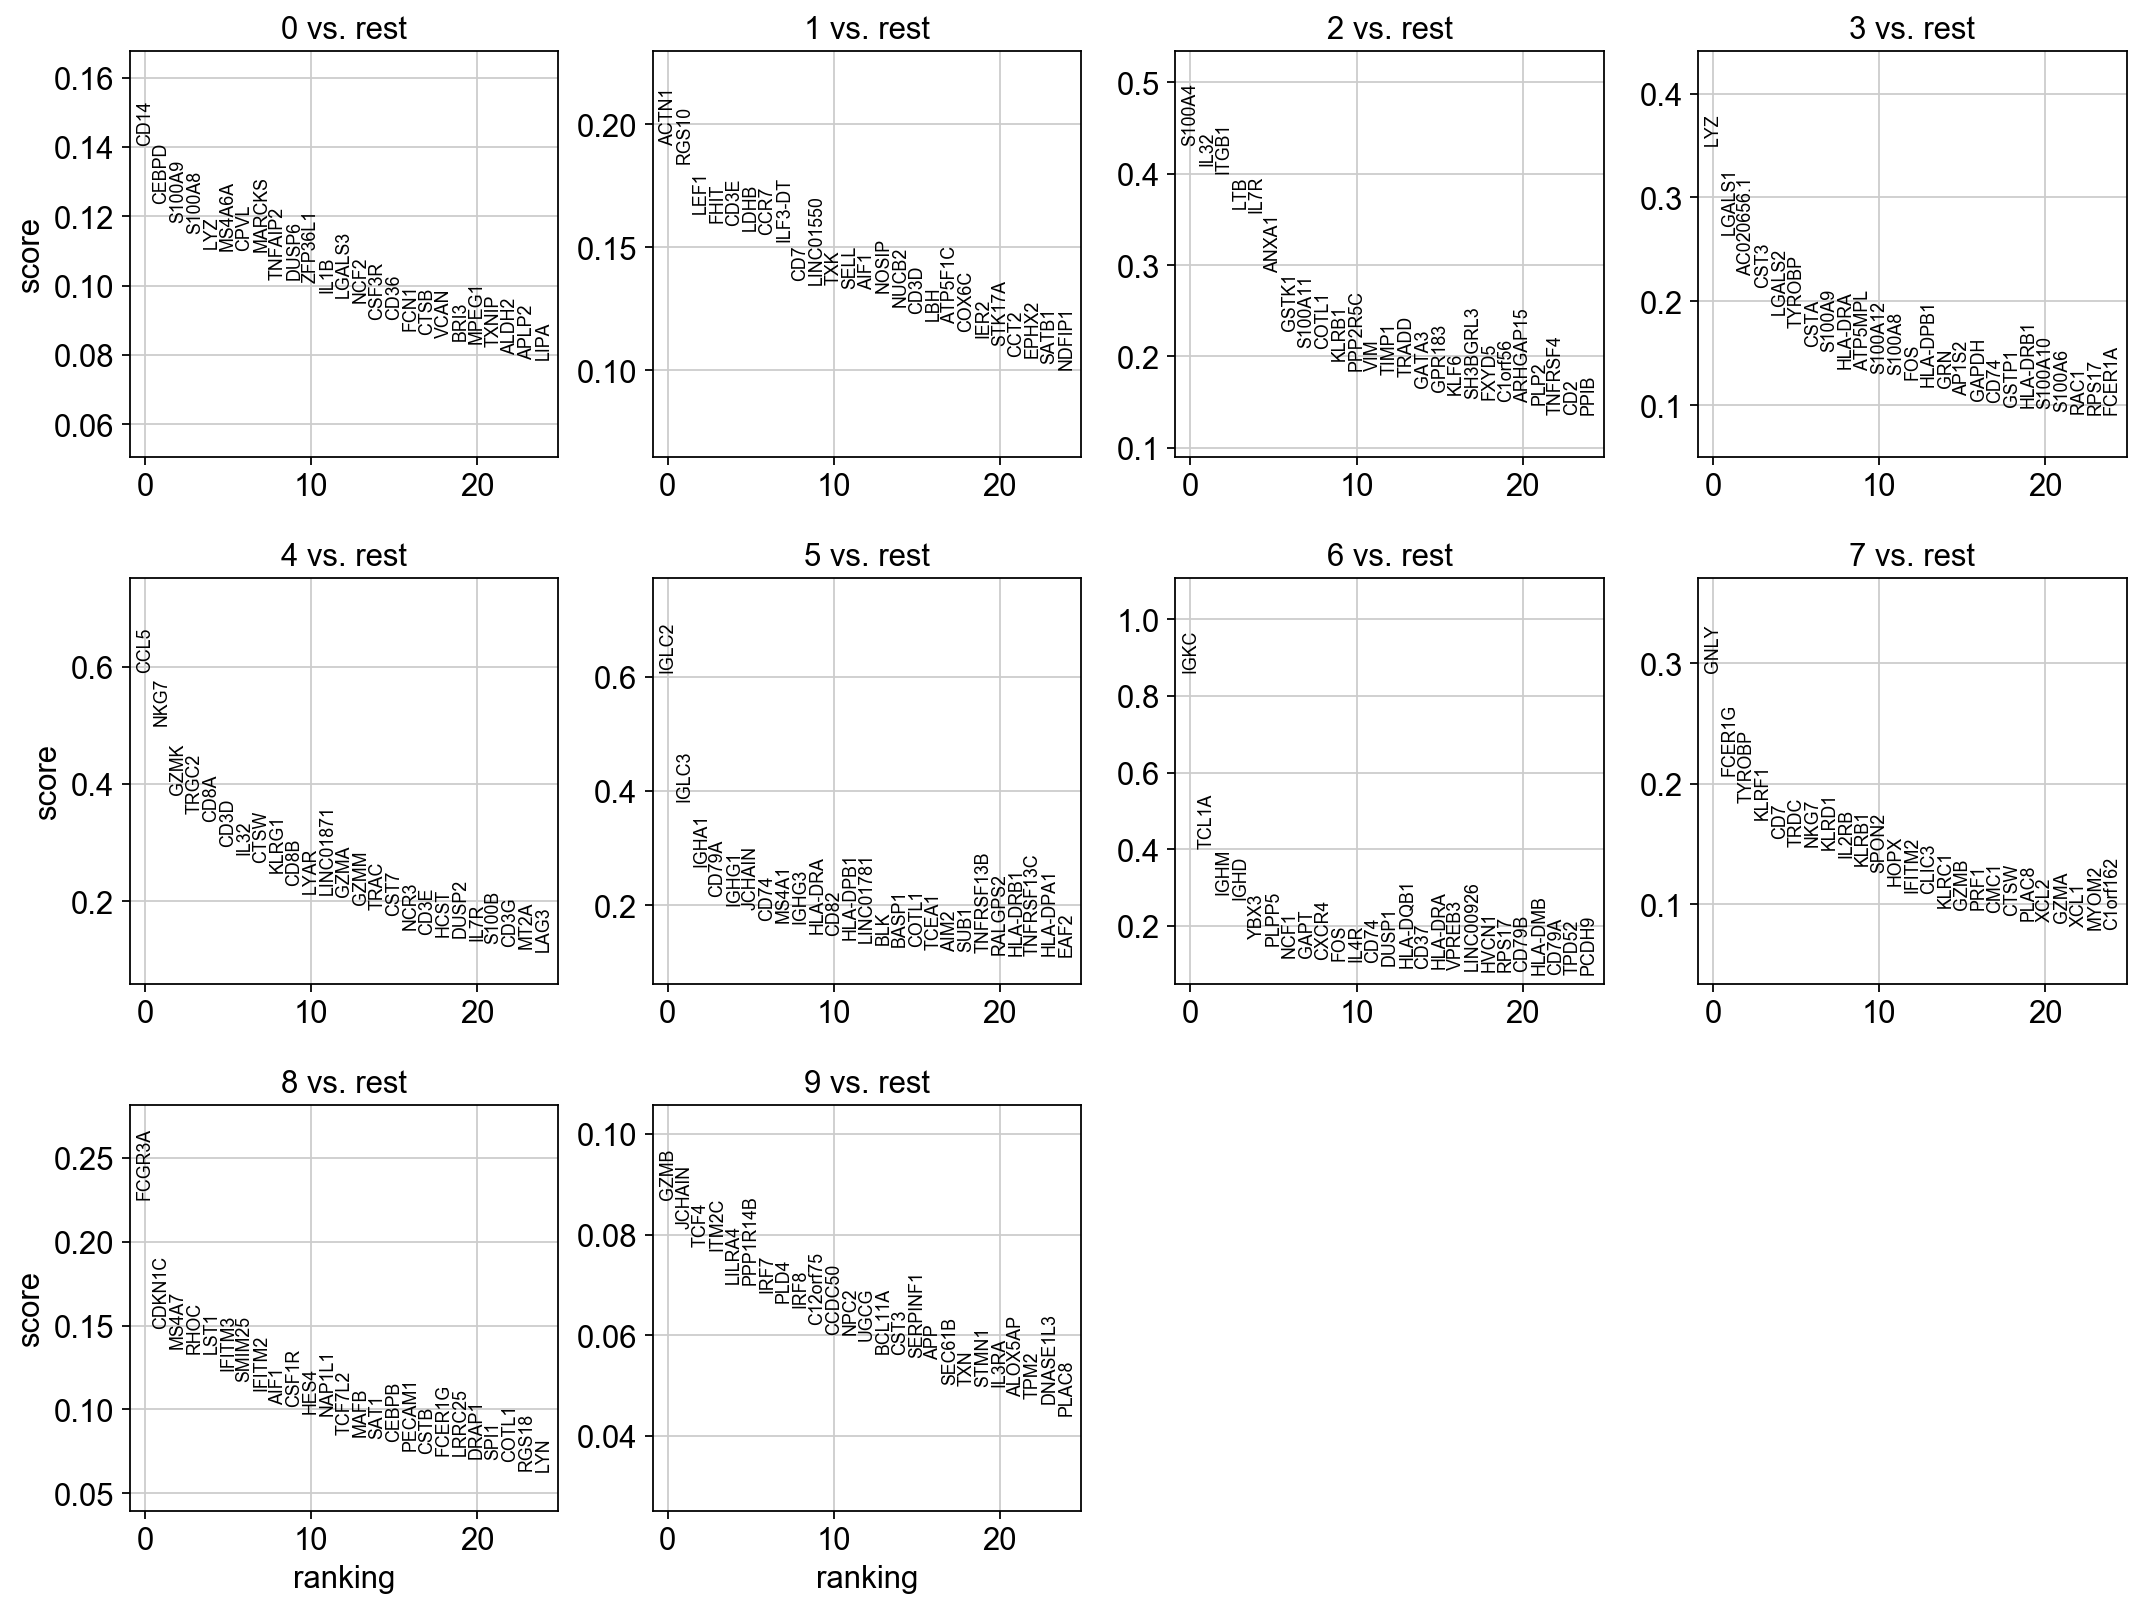

In [9]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

###Compare genes

Take the top 100 DE genes for cluster0 with each test and compare the overlap.

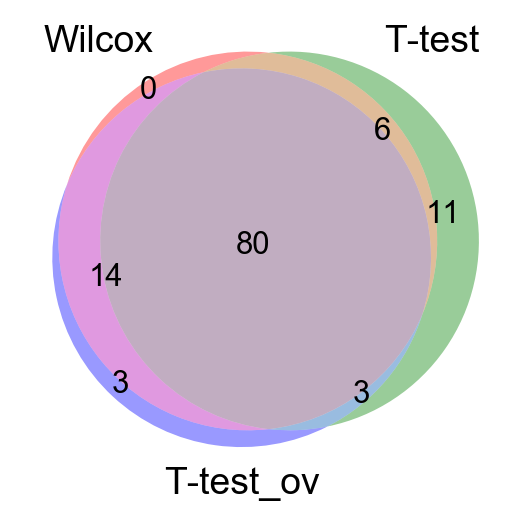

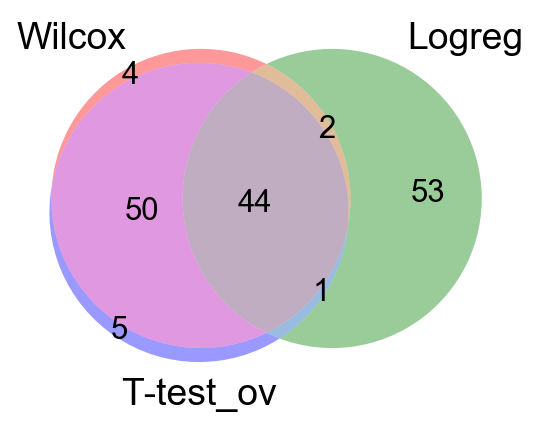

In [10]:
#compare cluster1 genes, only stores top 100 by default

wc = adata.uns['wilcoxon']['names']['0']
tt = adata.uns['t-test']['names']['0']
tt_ov = adata.uns['t-test_ov']['names']['0']
lr = adata.uns['logreg']['names']['0']

from matplotlib_venn import venn3

venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()


venn3([set(wc),set(lr),set(tt_ov)], ('Wilcox','Logreg','T-test_ov') )
plt.show()



As you can see, the Wilcoxon test and the T-test with overestimated variance gives very similar result. Also the regular T-test has good overlap, while the Logistic regression gives quite different genes.

### Visualization

There are several ways to visualize the expression of top DE genes. Here we will plot top 5 genes per cluster from Wilcoxon test as heatmap, dotplot, violin plot or matrix.

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_louvain_0.6']`


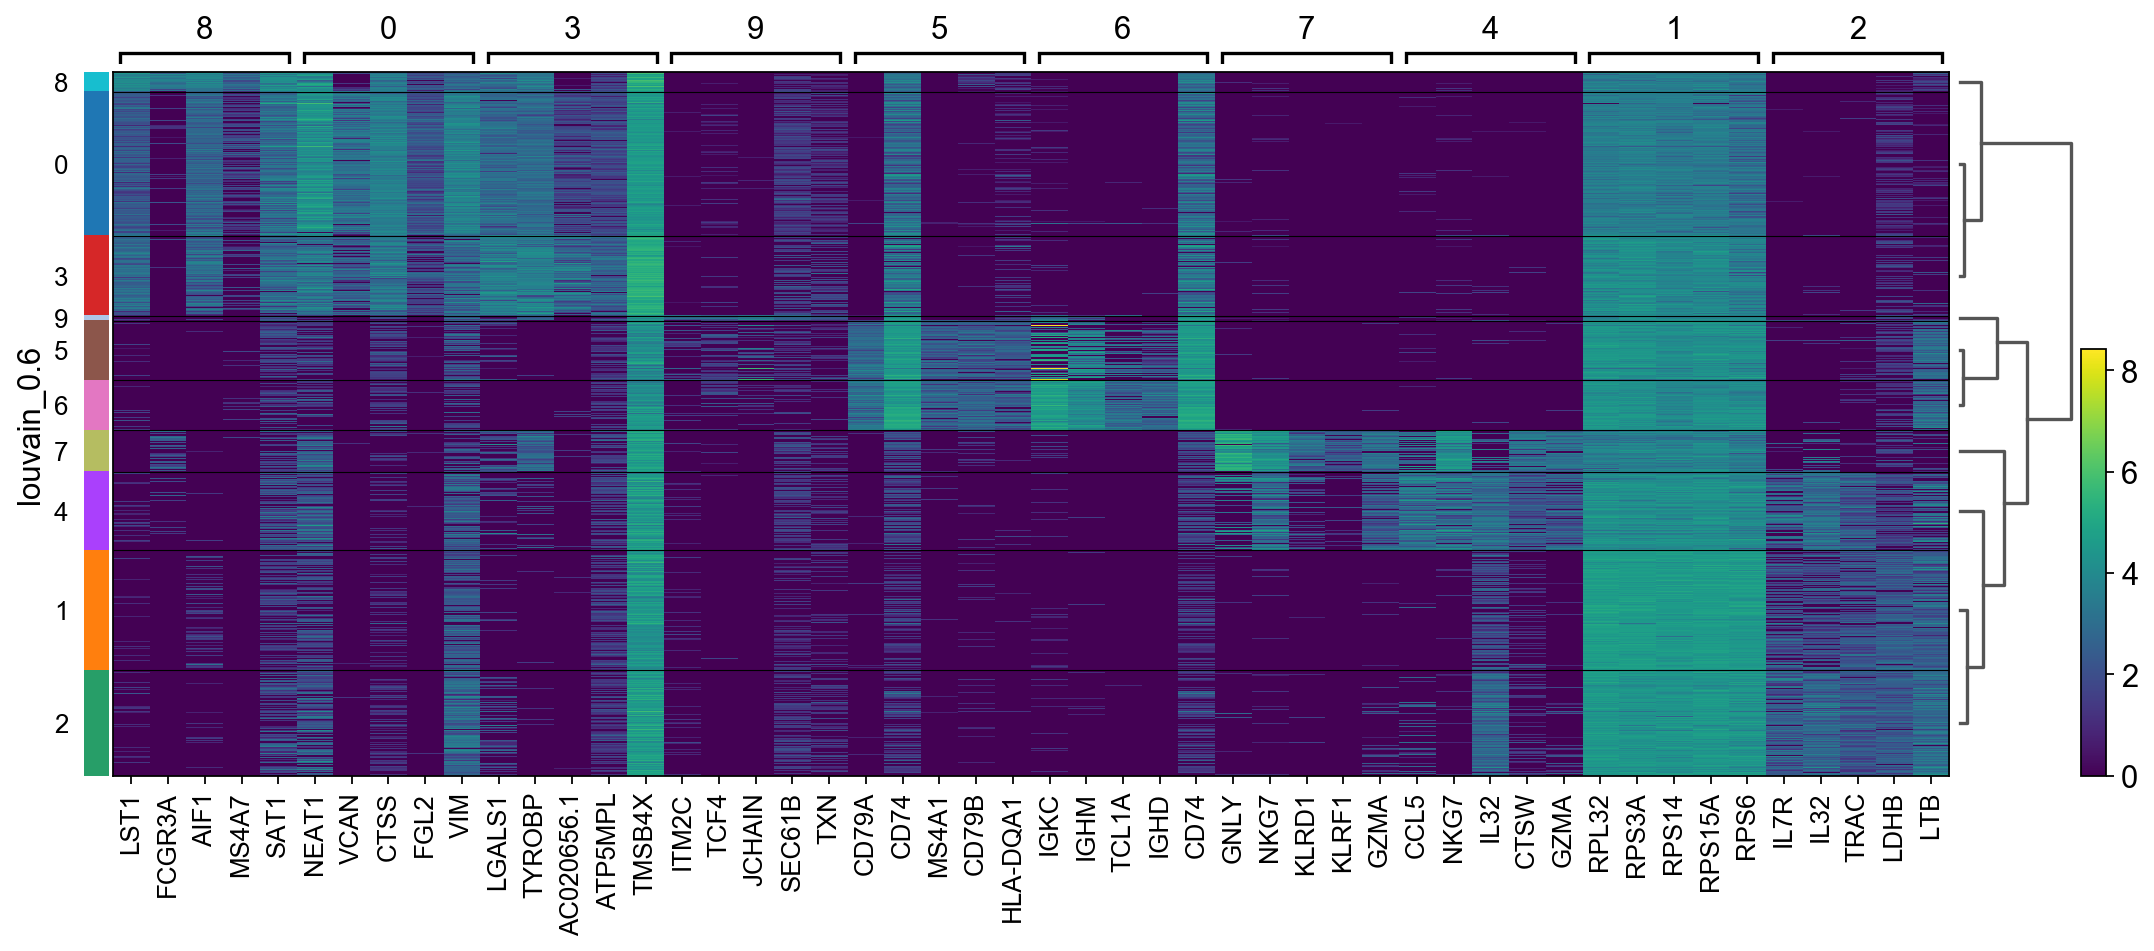

In [11]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6", show_gene_labels=True)

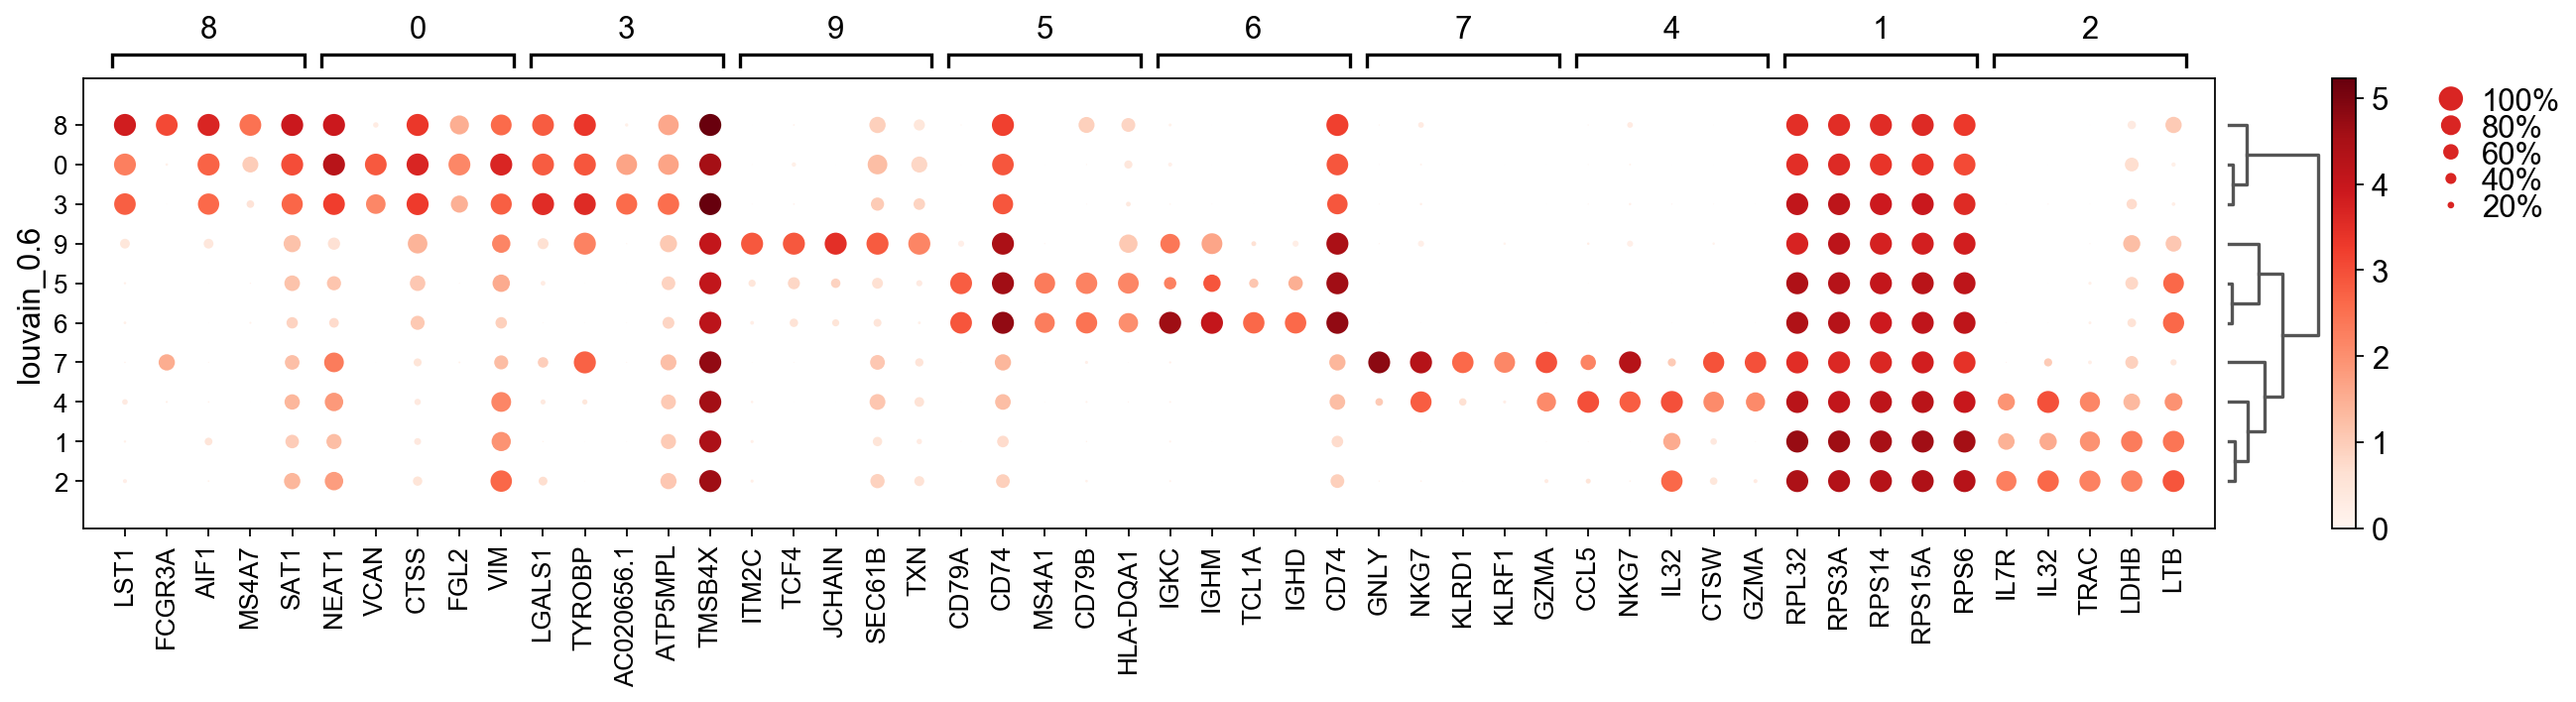

In [12]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

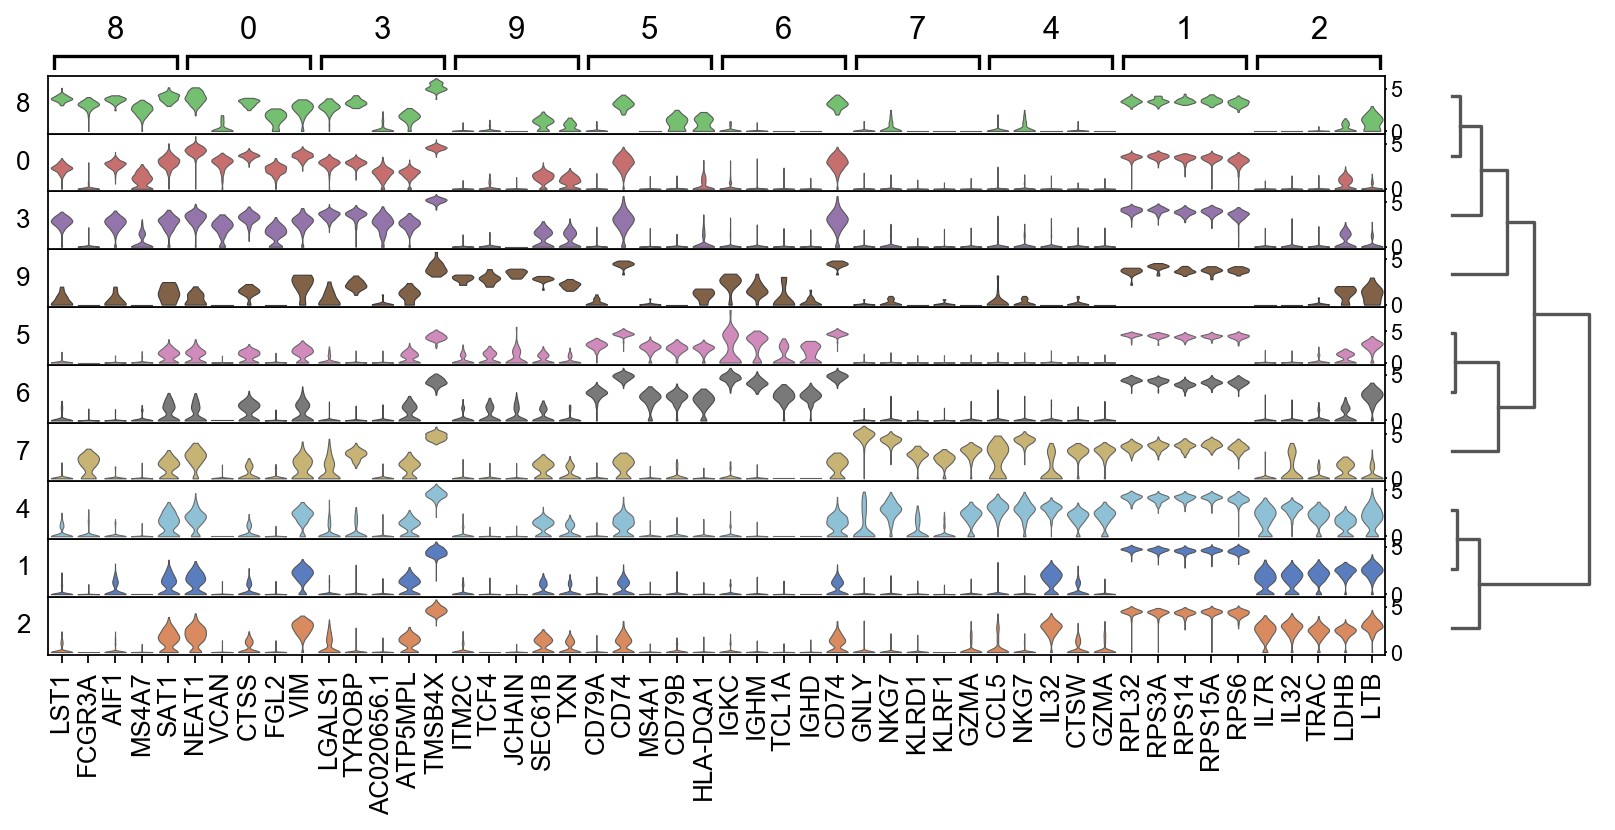

In [13]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

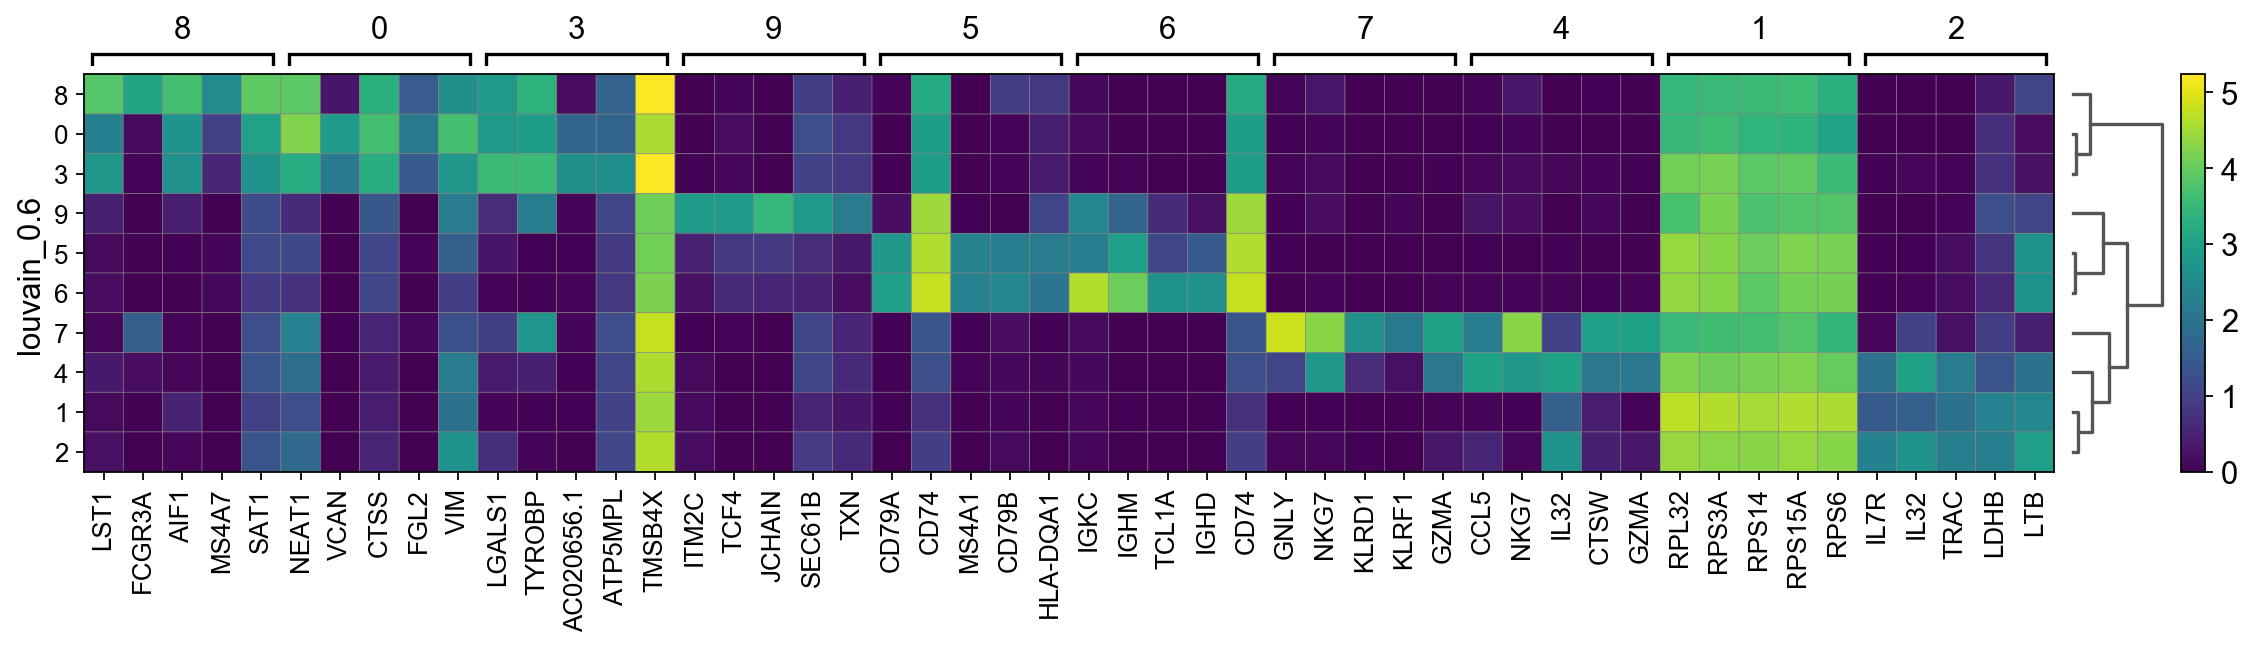

In [14]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

### Compare specific clusters

We can also do pairwise comparisons of individual clusters on one vs many clusters. 

For instance, clusters 2 & 6 have very similar expression profiles.

ranking genes
    finished (0:00:00)


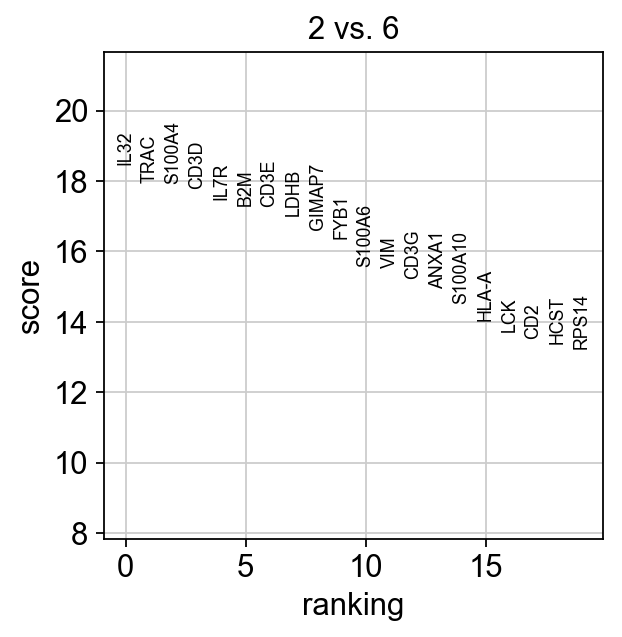

In [15]:
sc.tl.rank_genes_groups(adata, 'louvain_0.6', groups=['2'], reference='6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['2'], n_genes=20)

Plot as violins for those two groups.

/Users/asbj/miniconda3/envs/sc_course/lib/python3.6/site-packages/anndata/core/anndata.py:299: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


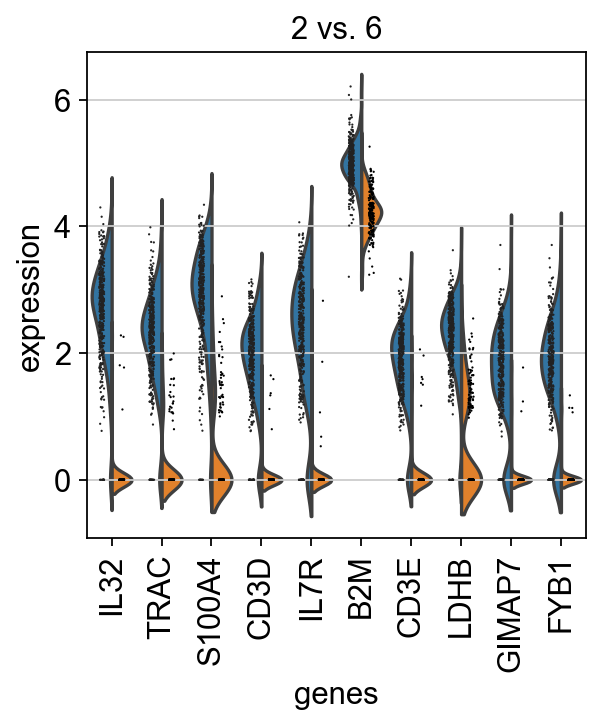

In [16]:
sc.pl.rank_genes_groups_violin(adata, groups='2', n_genes=10)


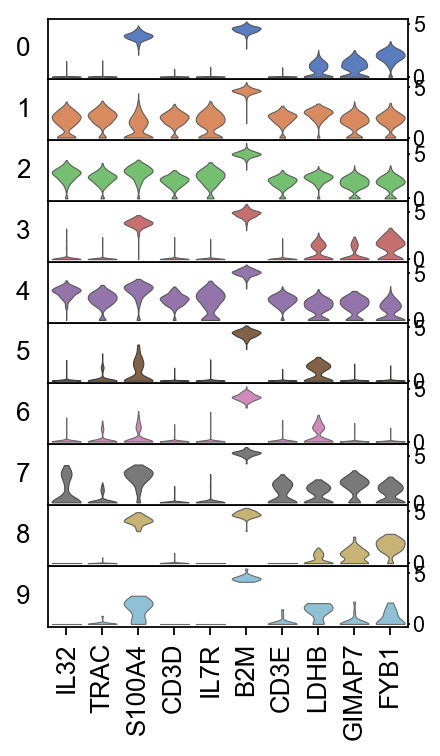

In [17]:
# plot the same genes as violins across all the datasets.

# convert numpy.recarray to list
mynames = [x[0] for x in adata.uns['rank_genes_groups']['names'][:10]]
sc.pl.stacked_violin(adata, mynames, groupby = 'louvain_0.6')
